In [1]:
import pandas as pd
import numpy as np

BASE_DIR = '/media/matteo/New Volume/WESAD'
subjects = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]


In [2]:
# for s in subjects:
#     print(f'Processing subject {s}')
#     data = pd.read_pickle(f'{BASE_DIR}/S{s}/S{s}.pkl')
#     data['subject'] = s
#     # data.to_csv(f'{BASE_DIR}/S{s}/S{s}.pkl.csv', index=False)
#     print(f'Subject {s} processed')

In [3]:
s = 3
data = pd.read_pickle(f'{BASE_DIR}/S{s}/S{s}.pkl')
data

FileNotFoundError: [Errno 2] No such file or directory: '/media/matteo/New Volume/WESAD/S3/S3.pkl'

In [ ]:
data.keys()


dict_keys(['signal', 'label', 'subject'])

In [ ]:
data["signal"].keys()


dict_keys(['chest', 'wrist'])

In [ ]:
data["signal"]["chest"].keys()


dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])

In [ ]:
print(len(data["signal"]["chest"]["ACC"]))
print(len(data["signal"]["chest"]["ECG"]))
print(len(data["signal"]["chest"]["EMG"]))
print(len(data["signal"]["chest"]["EDA"]))
print(len(data["signal"]["chest"]["Temp"]))
print(len(data["signal"]["chest"]["Resp"]))

4545100
4545100
4545100
4545100
4545100
4545100


In [ ]:
data["signal"]["wrist"].keys()


dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

In [ ]:
print(len(data["signal"]["wrist"]["ACC"]))
print(len(data["signal"]["wrist"]["BVP"]))
print(len(data["signal"]["wrist"]["EDA"]))
print(len(data["signal"]["wrist"]["TEMP"]))

207776
415552
25972
25972


In [ ]:
print(len(data["label"]))


4545100


In [ ]:
(unique, counts) = np.unique(data["label"], return_counts=True)
(unique, counts)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2345699,  798000,  448000,  262500,  546001,   51100,   46900,
          46900]))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

BASE_DIR = '/media/matteo/New Volume/WESAD'
subjects = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]

n_workers = 3
selected_subjects = subjects[:n_workers]
all_subjects_dfs = []
for s in selected_subjects:
    data = pd.read_pickle(f'{BASE_DIR}/S{s}/S{s}.pkl')
    chest_signal = data["signal"]["chest"]

    flattened_features = {}
    for key in ['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']:
        if isinstance(chest_signal[key], np.ndarray) and chest_signal[key].ndim > 1:
            for i in range(chest_signal[key].shape[1]):
                flattened_features[f"{key}_{i}"] = chest_signal[key][:, i]
        else:
            flattened_features[key] = chest_signal[key]

    features = pd.DataFrame(flattened_features)
    target = data["label"]
    # parse target to dataframe
    target = pd.DataFrame(target, columns=['label'])

    # Combine features and target
    df = pd.concat([features, target], axis=1)
    all_subjects_dfs.append(df)
    all_subjects_dfs


FileNotFoundError: [Errno 2] No such file or directory: '/media/matteo/New Volume/WESAD/S2/S2.pkl'

In [ ]:
all_subjects_dfs

[          ACC_0   ACC_1   ACC_2     ECG_0     EMG_0     EDA_0     Temp_0  \
 0        0.9554 -0.2220 -0.5580  0.021423 -0.004440  5.250549  30.120758   
 1        0.9258 -0.2216 -0.5538  0.020325  0.004349  5.267334  30.129517   
 2        0.9082 -0.2196 -0.5392  0.016525  0.005173  5.243301  30.138214   
 3        0.8974 -0.2102 -0.5122  0.016708  0.007187  5.249405  30.129517   
 4        0.8882 -0.2036 -0.4824  0.011673 -0.015152  5.286407  30.130951   
 ...         ...     ...     ...       ...       ...       ...        ...   
 4255295  0.8750 -0.1234 -0.2974 -0.013138  0.020370  0.400162  31.457733   
 4255296  0.8750 -0.1262 -0.2988 -0.010345  0.019592  0.355911  31.476898   
 4255297  0.8718 -0.1238 -0.3042 -0.005447 -0.017166  0.360489  31.459229   
 4255298  0.8730 -0.1234 -0.3026  0.000137 -0.028976  0.365829  31.484283   
 4255299  0.8702 -0.1220 -0.3022  0.004074 -0.023575  0.365448  31.456268   
 
            Resp_0  label  
 0       -1.148987      0  
 1       -1.124573

### plotting distribution

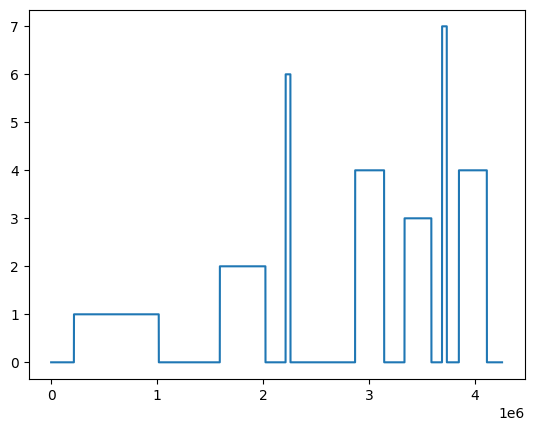

Subject 2 - unique values: label
0    2142701
1     800800
4     537599
2     430500
3     253400
6      45500
7      44800
Name: count, dtype: int64
-----
Subject 2 - unique values: label
1    800800
2    430500
Name: count, dtype: int64


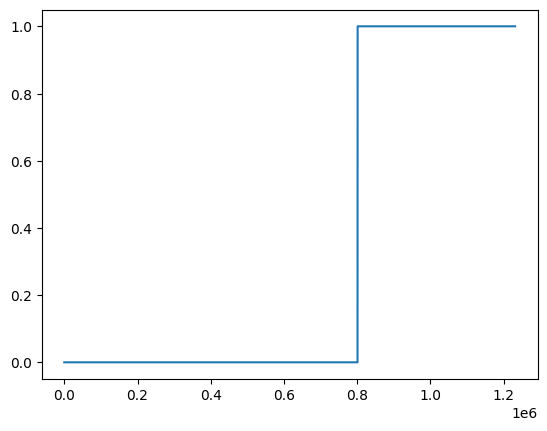

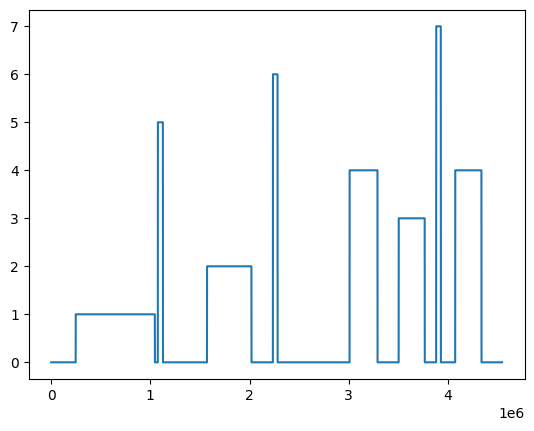

Subject 3 - unique values: label
0    2345699
1     798000
4     546001
2     448000
3     262500
5      51100
6      46900
7      46900
Name: count, dtype: int64
-----
Subject 3 - unique values: label
1    798000
2    448000
Name: count, dtype: int64


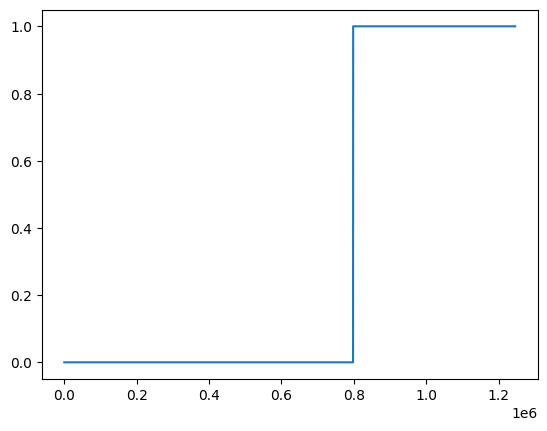

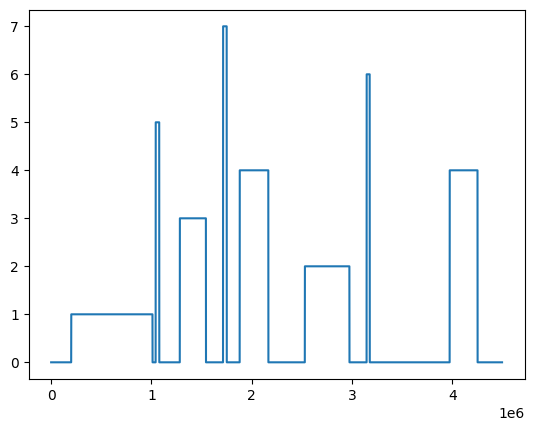

Subject 4 - unique values: label
0    2314199
1     810601
4     563500
2     444500
3     260400
7      36401
5      35699
6      30800
Name: count, dtype: int64
-----
Subject 4 - unique values: label
1    810601
2    444500
Name: count, dtype: int64


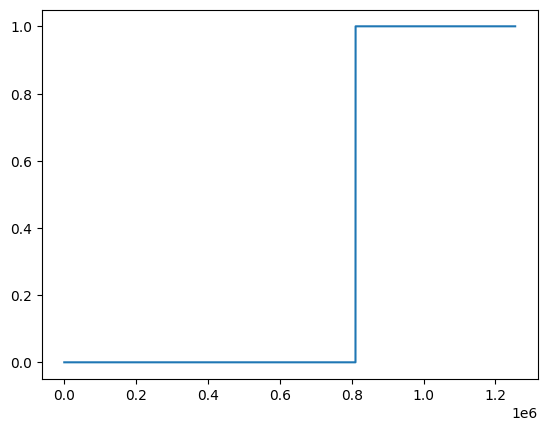

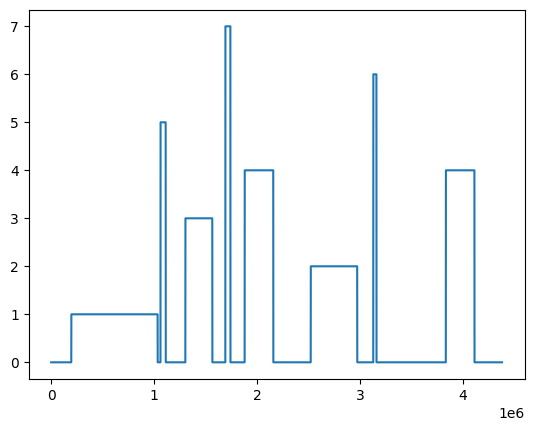

Subject 5 - unique values: label
0    2142700
1     838600
4     555800
2     451500
3     261800
5      50401
7      49000
6      30799
Name: count, dtype: int64
-----
Subject 5 - unique values: label
1    838600
2    451500
Name: count, dtype: int64


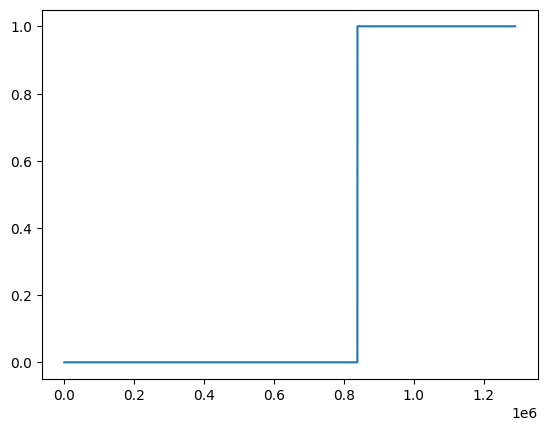

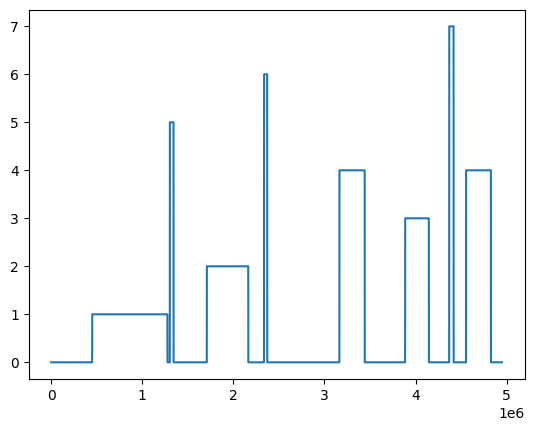

Subject 6 - unique values: label
0    2733499
1     826000
4     550900
2     455000
3     260400
7      48300
5      40600
6      35001
Name: count, dtype: int64
-----
Subject 6 - unique values: label
1    826000
2    455000
Name: count, dtype: int64


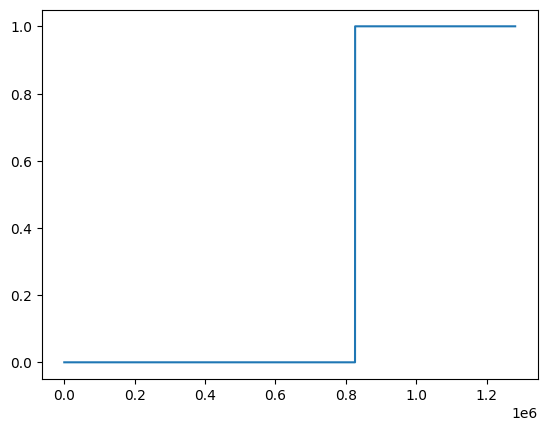

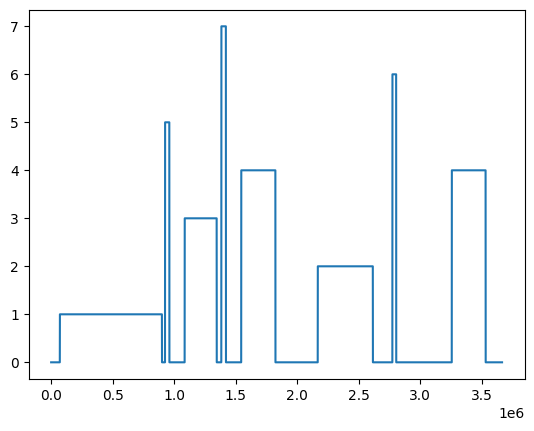

Subject 7 - unique values: label
0    1472098
1     830200
4     553001
2     448000
3     260401
7      37101
5      35000
6      30799
Name: count, dtype: int64
-----
Subject 7 - unique values: label
1    830200
2    448000
Name: count, dtype: int64


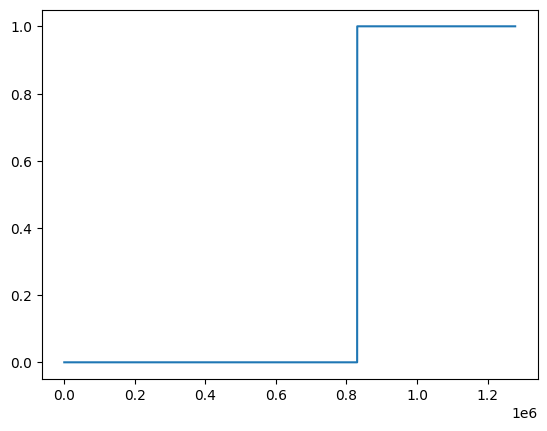

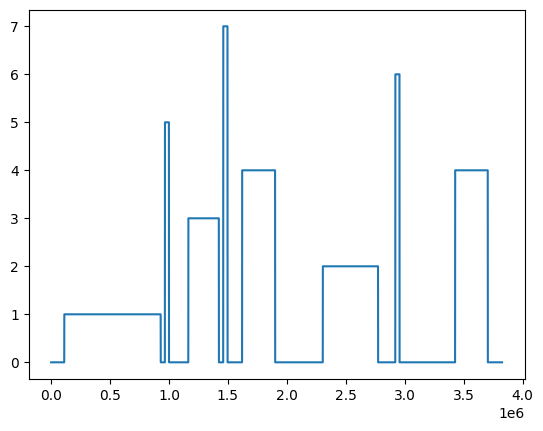

Subject 8 - unique values: label
0    1616300
1     818300
4     557200
2     469000
3     258999
7      36400
6      35701
5      34300
Name: count, dtype: int64
-----
Subject 8 - unique values: label
1    818300
2    469000
Name: count, dtype: int64


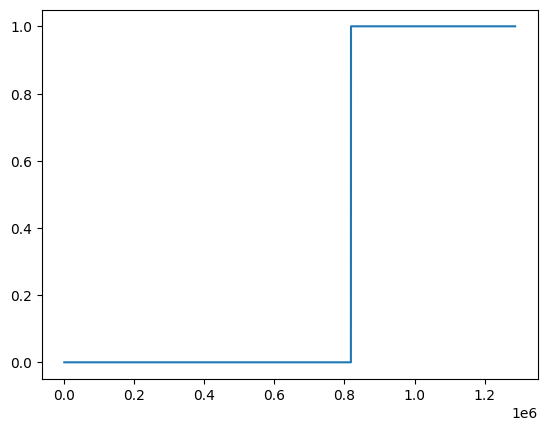

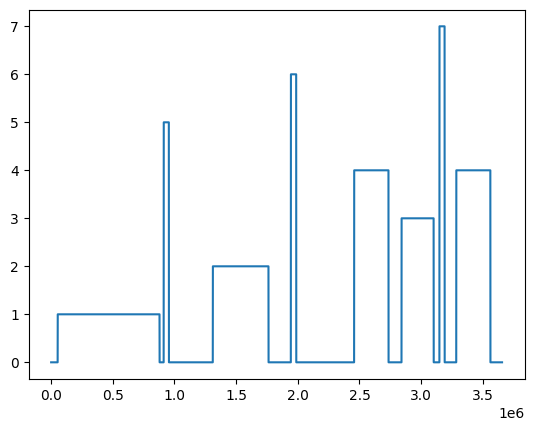

Subject 9 - unique values: label
0    1435700
1     826000
4     555100
2     451500
3     260400
6      43400
5      42000
7      42000
Name: count, dtype: int64
-----
Subject 9 - unique values: label
1    826000
2    451500
Name: count, dtype: int64


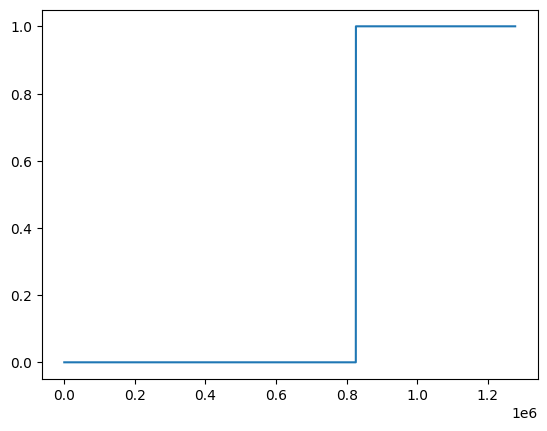

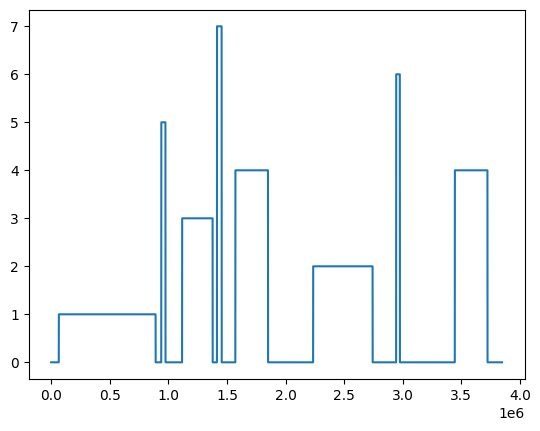

Subject 10 - unique values: label
0    1589000
1     826000
4     557200
2     507500
3     260400
7      39900
5      35700
6      31500
Name: count, dtype: int64
-----
Subject 10 - unique values: label
1    826000
2    507500
Name: count, dtype: int64


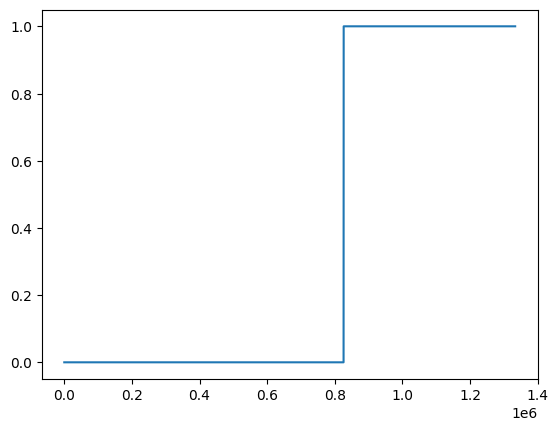

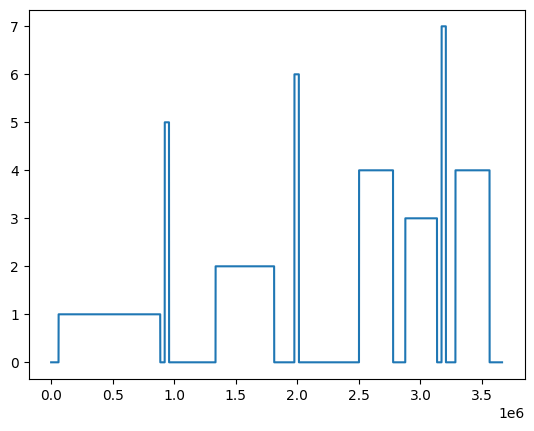

Subject 11 - unique values: label
0    1443400
1     826000
4     553701
2     476000
3     257600
6      36399
5      35000
7      35000
Name: count, dtype: int64
-----
Subject 11 - unique values: label
1    826000
2    476000
Name: count, dtype: int64


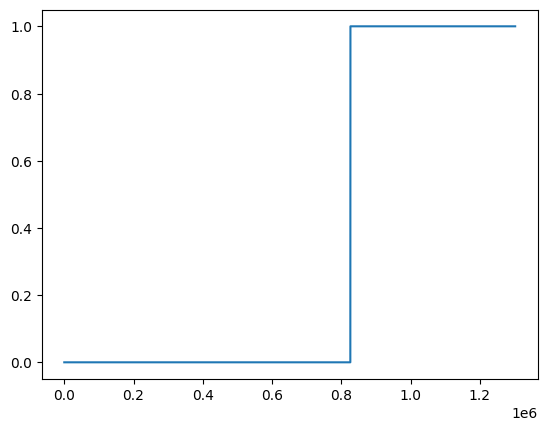

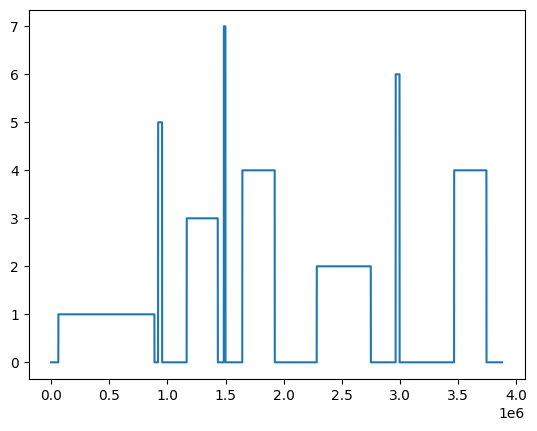

Subject 13 - unique values: label
0    1679300
1     826001
4     556499
2     464800
3     267400
5      34300
6      33600
7      14000
Name: count, dtype: int64
-----
Subject 13 - unique values: label
1    826001
2    464800
Name: count, dtype: int64


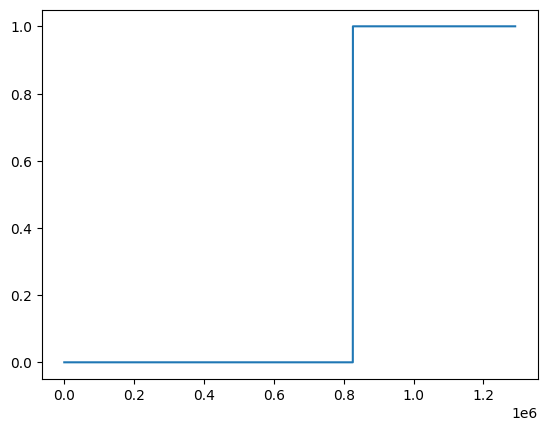

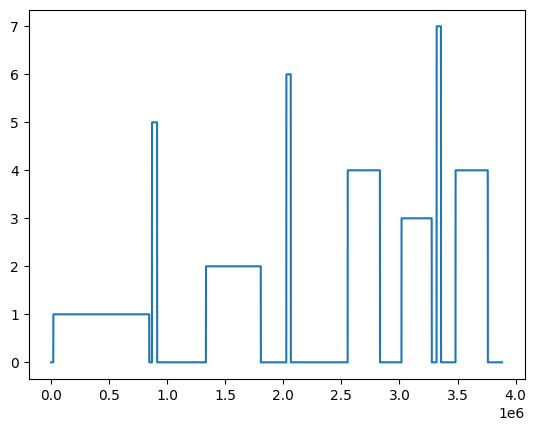

Subject 14 - unique values: label
0    1648499
1     826000
4     555800
2     472500
3     260401
5      44100
6      38500
7      37800
Name: count, dtype: int64
-----
Subject 14 - unique values: label
1    826000
2    472500
Name: count, dtype: int64


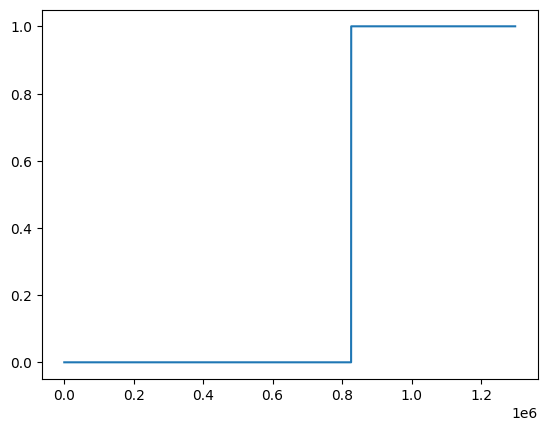

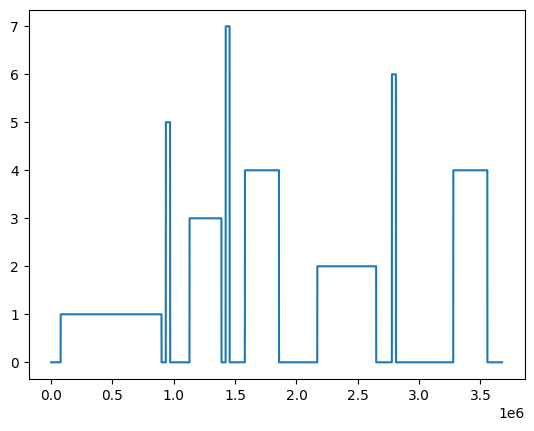

Subject 15 - unique values: label
0    1457401
1     822500
4     555799
2     480200
3     260400
5      35000
6      32900
7      32200
Name: count, dtype: int64
-----
Subject 15 - unique values: label
1    822500
2    480200
Name: count, dtype: int64


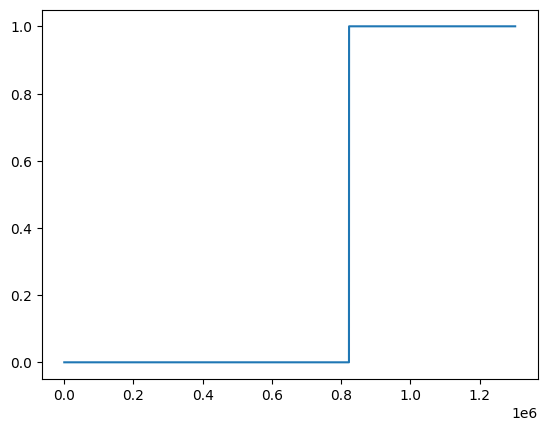

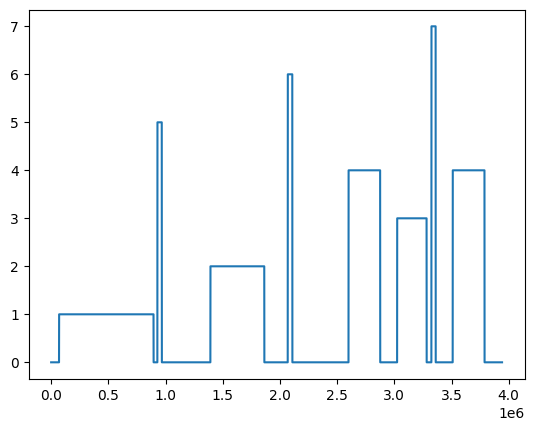

Subject 16 - unique values: label
0    1717100
1     826000
4     554399
2     471101
3     257600
6      39900
5      38500
7      37100
Name: count, dtype: int64
-----
Subject 16 - unique values: label
1    826000
2    471101
Name: count, dtype: int64


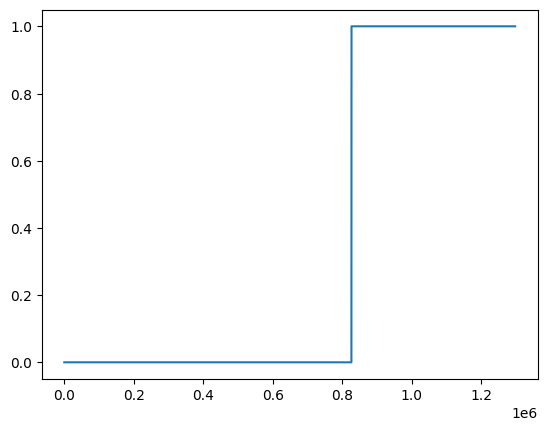

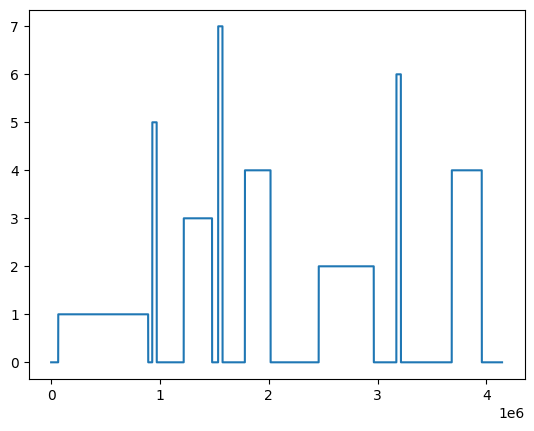

Subject 17 - unique values: label
0    1917301
1     826700
4     511700
2     506100
3     260400
6      41299
5      40600
7      39900
Name: count, dtype: int64
-----
Subject 17 - unique values: label
1    826700
2    506100
Name: count, dtype: int64


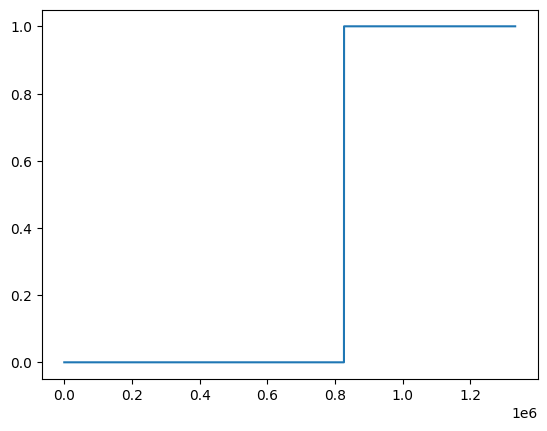

In [7]:
import matplotlib.pyplot as plt
import os
import numpy as np

BASE_DIR = '/home/matteo/Documents/postDoc/CTTC/WESAD'
subjects = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]

for s in subjects:

    parsed_df_file_location_parent = f'{BASE_DIR}/S{s}'
    file_name = f'S{s}_esn.pkl'
    data = pd.read_pickle(f'{BASE_DIR}/S{s}/S{s}.pkl')

    chest_signal = data["signal"]["chest"]

    flattened_features = {}
    for key in ['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp']:
        if isinstance(chest_signal[key], np.ndarray) and chest_signal[key].ndim > 1:
            for i in range(chest_signal[key].shape[1]):
                flattened_features[f"{key}_{i}"] = chest_signal[key][:, i]
        else:
            flattened_features[key] = chest_signal[key]

    features = pd.DataFrame(flattened_features)
    target = data["label"]
    # parse target to dataframe
    target = pd.DataFrame(target, columns=['label'])
    subject = pd.DataFrame([s] * len(target), columns=['subject'])

    # Combine features and target
    df = pd.concat([features, target, subject], axis=1)

    plt.plot(df["label"].values)
    plt.show()

    # count unique values
    unique_values = df["label"].value_counts()
    print(f'Subject {s} - unique values: {unique_values}')
    df = df[(df["label"] == 1) | (df["label"] == 2)]
    df = df.reset_index(drop=True)
    print("-----")
    unique_values = df["label"].value_counts()
    print(f'Subject {s} - unique values: {unique_values}')
    df["label"] = df["label"] - 1

    plt.plot(df["label"].values)
    plt.show()